In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
#Load Dataset
data=pd.read_csv('/content/headbrain.csv')
data .head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams),Class
0,F,2,2720,955,0
1,F,2,2773,1076,0
2,F,1,2857,1027,0
3,F,2,2864,1012,0
4,F,2,2937,1070,0


In [61]:
#Columns in Dataset
c=data.columns
print('Columns in our dataset -> ',c)

Columns in our dataset ->  Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)',
       'Class'],
      dtype='object')


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               237 non-null    object
 1   Age Range            237 non-null    int64 
 2   Head Size(cm^3)      237 non-null    int64 
 3   Brain Weight(grams)  237 non-null    int64 
 4   Class                237 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [64]:
data.dropna(inplace=True)   #null values delete

In [65]:
data.drop_duplicates(inplace=True)  #delete duplicate rows

In [66]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               237 non-null    object
 1   Age Range            237 non-null    int64 
 2   Head Size(cm^3)      237 non-null    int64 
 3   Brain Weight(grams)  237 non-null    int64 
 4   Class                237 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB
None


In [67]:
#converting categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [68]:
data['Gender']=l.fit_transform(data['Gender'])
print(data)    #0 for female and 1 for male

     Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)  Class
0         0          2             2720                  955      0
1         0          2             2773                 1076      0
2         0          1             2857                 1027      0
3         0          2             2864                 1012      0
4         0          2             2937                 1070      0
..      ...        ...              ...                  ...    ...
232       1          2             4430                 1620      1
233       1          2             4442                 1330      1
234       1          2             4488                 1440      1
235       1          1             4512                 1530      1
236       1          1             4747                 1635      1

[237 rows x 5 columns]


<ipython-input-69-7fea6d3d1c30>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Brain Weight(grams)'])
<ipython-input-69-7fea6d3d1c30>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Head Size(cm^3)'])


<Axes: xlabel='Head Size(cm^3)', ylabel='Density'>

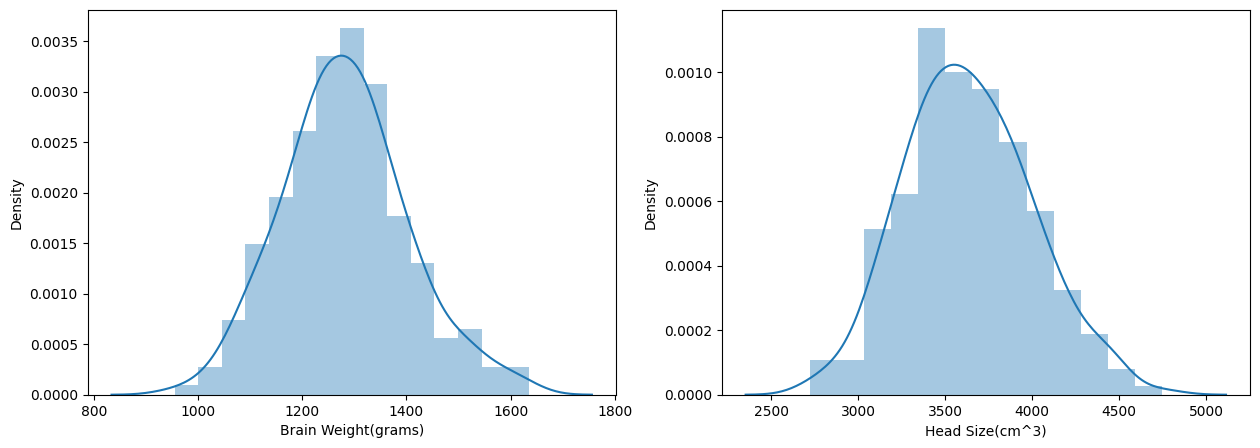

In [69]:
#Data preprocessing
#Statistical analysis
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['Brain Weight(grams)'])
plt.subplot(1,2,2)
sns.distplot(data['Head Size(cm^3)'])

In [70]:
print(data['Brain Weight(grams)'].mean())
print(data['Brain Weight(grams)'].max())
print(data['Brain Weight(grams)'].min())
print(data['Brain Weight(grams)'].std())

1282.873417721519
1635
955
120.3404457864572


In [71]:
print(data['Head Size(cm^3)'].mean())
print(data['Head Size(cm^3)'].max())
print(data['Head Size(cm^3)'].min())
print(data['Head Size(cm^3)'].std())

3633.9915611814345
4747
2720
365.26142241981375


In [72]:
#Dealing with outliers using z-score
#bounadry values
print('Highest',data['Brain Weight(grams)'].mean()+3*data['Brain Weight(grams)'].std())
print('Lowest',data['Brain Weight(grams)'].mean()-3*data['Brain Weight(grams)'].std())

print('Highest',data['Head Size(cm^3)'].mean()+3*data['Head Size(cm^3)'].std())
print('Lowest',data['Head Size(cm^3)'].mean()-3*data['Head Size(cm^3)'].std())


Highest 1643.8947550808907
Lowest 921.8520803621474
Highest 4729.775828440876
Lowest 2538.2072939219934


In [73]:
data[(data['Brain Weight(grams)']>1643.89)|(data['Brain Weight(grams)']<921.852)]

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams),Class


In [74]:
data[(data['Head Size(cm^3)']>4729.775)|(data['Head Size(cm^3)']<2538.2072)]

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams),Class
236,1,1,4747,1635,1


In [75]:
#Handle theoutliers using trimming method
h=data[(data['Head Size(cm^3)']<4729.775)&(data['Head Size(cm^3)']>2538.2072)]
print(h)
print(h.info())

     Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)  Class
0         0          2             2720                  955      0
1         0          2             2773                 1076      0
2         0          1             2857                 1027      0
3         0          2             2864                 1012      0
4         0          2             2937                 1070      0
..      ...        ...              ...                  ...    ...
231       1          2             4430                 1510      1
232       1          2             4430                 1620      1
233       1          2             4442                 1330      1
234       1          2             4488                 1440      1
235       1          1             4512                 1530      1

[236 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 0 to 235
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------  

In [76]:
#save the preprocessed data into new csv file
df=h.to_csv('headbrain2.csv',index=False)

In [77]:
df=pd.read_csv('headbrain2.csv')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               236 non-null    int64
 1   Age Range            236 non-null    int64
 2   Head Size(cm^3)      236 non-null    int64
 3   Brain Weight(grams)  236 non-null    int64
 4   Class                236 non-null    int64
dtypes: int64(5)
memory usage: 9.3 KB


In [79]:
print(df)

     Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)  Class
0         0          2             2720                  955      0
1         0          2             2773                 1076      0
2         0          1             2857                 1027      0
3         0          2             2864                 1012      0
4         0          2             2937                 1070      0
..      ...        ...              ...                  ...    ...
231       1          2             4430                 1510      1
232       1          2             4430                 1620      1
233       1          2             4442                 1330      1
234       1          2             4488                 1440      1
235       1          1             4512                 1530      1

[236 rows x 5 columns]


<Axes: xlabel='Class', ylabel='count'>

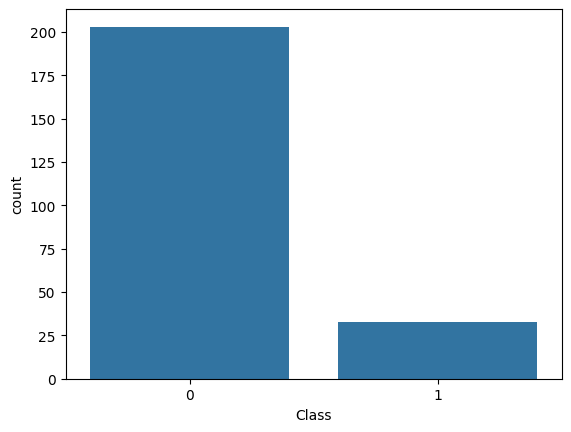

In [80]:
#Statistic analysis
import seaborn as sns
sns.countplot(x='Class',data=df)

In [81]:
#Find out the  total normal and abnormal patients
Normal=len(df[df['Class']==0])
Abnormal=len(df[df['Class']==1])
print(' Normal Patients ',Normal)
print('Abnormal Patients ',Abnormal)

 Normal Patients  203
Abnormal Patients  33


In [82]:
# M or F from Normal Patients
n=df[df['Class']==0]
male=len(n[n.Gender==1])
female=len(n[n.Gender==0])
print('Number of Male =',male)
print('Number of Female =',female)

Number of Male = 101
Number of Female = 102


In [83]:
# M or F from AbNormal Patients
n=df[df['Class']==1]
male=len(n[n.Gender==1])
female=len(n[n.Gender==0])
print('Number of Male =',male)
print('Number of Female =',female)

Number of Male = 32
Number of Female = 1


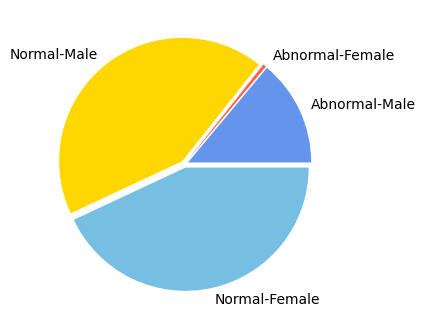

In [84]:
plt.figure(figsize=(4,4))
s=['Abnormal-Male','Abnormal-Female','Normal-Male','Normal-Female']
t=[33,1,101,102]
e=[0.03,0.03,0.03,0.03]
plt.pie(t,labels=s,colors=['cornflowerblue','tomato','gold','#77BFE2'],explode=e)
plt.show()

In [85]:
#Split the independent and dependent variables
x=df.drop(['Class'],axis=1)
print(x)

     Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         0          2             2720                  955
1         0          2             2773                 1076
2         0          1             2857                 1027
3         0          2             2864                 1012
4         0          2             2937                 1070
..      ...        ...              ...                  ...
231       1          2             4430                 1510
232       1          2             4430                 1620
233       1          2             4442                 1330
234       1          2             4488                 1440
235       1          1             4512                 1530

[236 rows x 4 columns]


In [86]:
y=df.Class
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
231    1
232    1
233    1
234    1
235    1
Name: Class, Length: 236, dtype: int64


In [87]:
#Split data in training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Decision Tree

In [88]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

In [89]:
t=DecisionTreeClassifier(max_depth=2)

In [90]:
t.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

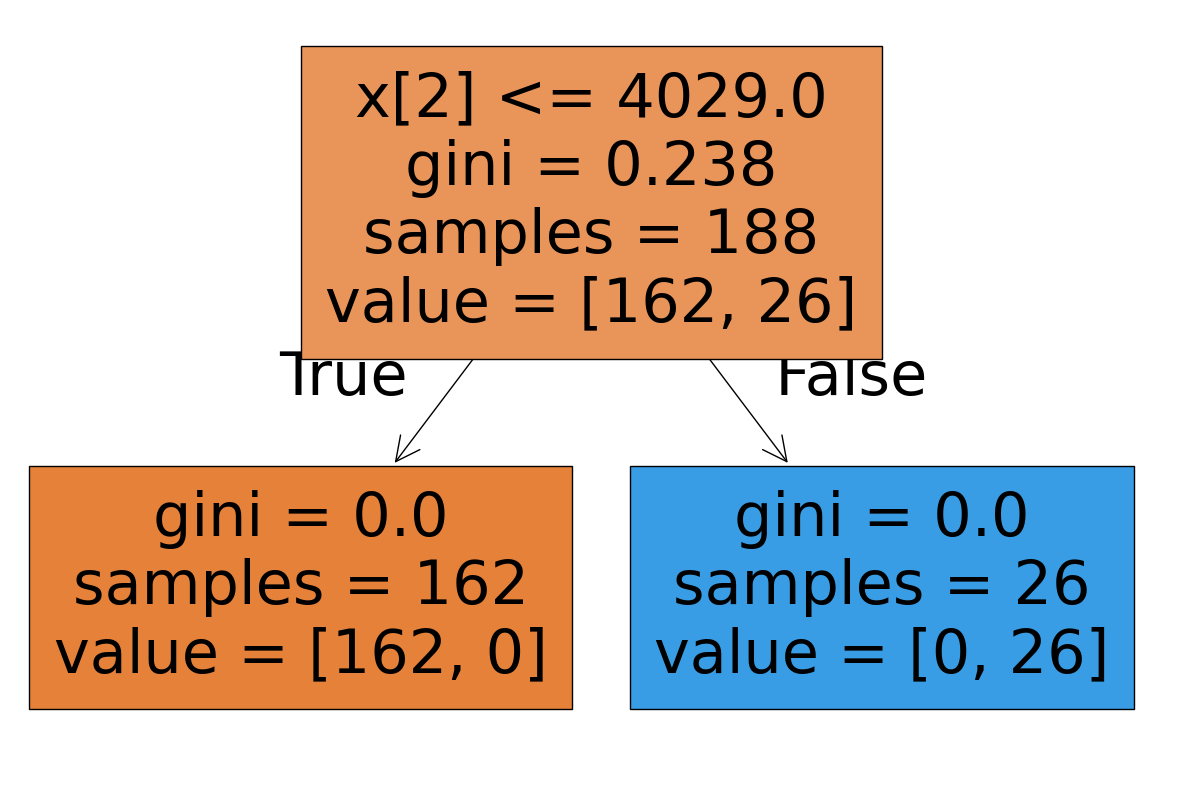

In [91]:
import matplotlib.pyplot as plt

from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(t,filled=True)
plt.show()

In [92]:
#prediction
y_pred=t.predict(x_test)

In [93]:
#Test accuracy of decision tree algorihtm
from sklearn.metrics import accuracy_score,classification_report
y_train_pred=t.predict(x_train)
y_test_pred=t.predict(x_test)

In [94]:
print('Training Accuracy = ',accuracy_score(y_train,y_train_pred))
print('Testing Accuracy =',accuracy_score(y_test,y_test_pred))

Training Accuracy =  1.0
Testing Accuracy = 0.9791666666666666


In [95]:
#classification report  of decision tree
l=classification_report(y_pred,y_test)
print(l)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.88      0.93         8

    accuracy                           0.98        48
   macro avg       0.99      0.94      0.96        48
weighted avg       0.98      0.98      0.98        48



## Linear regression model

In [96]:
from sklearn.linear_model import LinearRegression
r=LinearRegression()
r.fit(x_train,y_train)

LinearRegression()

In [97]:
#Accuracy of linear regression algorithm
linear_accuracy1=r.score(x_test,y_test)
linear_accuracy2=r.score(x_train,y_train)

In [98]:
print('Testing accuracy = ',linear_accuracy1)
print('Training Accuracy = ',linear_accuracy2)

Testing accuracy =  0.4098873339209059
Training Accuracy =  0.4548741875404638


# Logistic Regression Model

In [99]:
#Fitting Logistic Regression to Training set
from sklearn.linear_model import LogisticRegression

In [100]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [102]:
#Test accuracy of logistic algorithm
from sklearn.metrics import accuracy_score
print('Training Accuracy = ',accuracy_score(y_train,y_train_pred))
print('Testing Accuracy = ',accuracy_score(y_test,y_test_pred))

Training Accuracy =  1.0
Testing Accuracy =  0.9791666666666666


In [103]:
#classification report  of logistic algorithm
l=classification_report(y_pred,y_test)
print(l)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.88      0.93         8

    accuracy                           0.98        48
   macro avg       0.99      0.94      0.96        48
weighted avg       0.98      0.98      0.98        48



In [104]:
g=int(input("Enter Gender "))
age=int(input("Enter Age "))
h=int(input("Enter Head Size "))
bw=int(input("Enter Brain Weight "))
p=[[g,age,h,bw]]
prediction=model.predict(p)
print("prediction for input",p,"=","Abnormal" if prediction[0]==1 else "Normal")

Enter Gender 2
Enter Age 2
Enter Head Size 2750
Enter Brain Weight 955
prediction for input [[2, 2, 2750, 955]] = Normal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


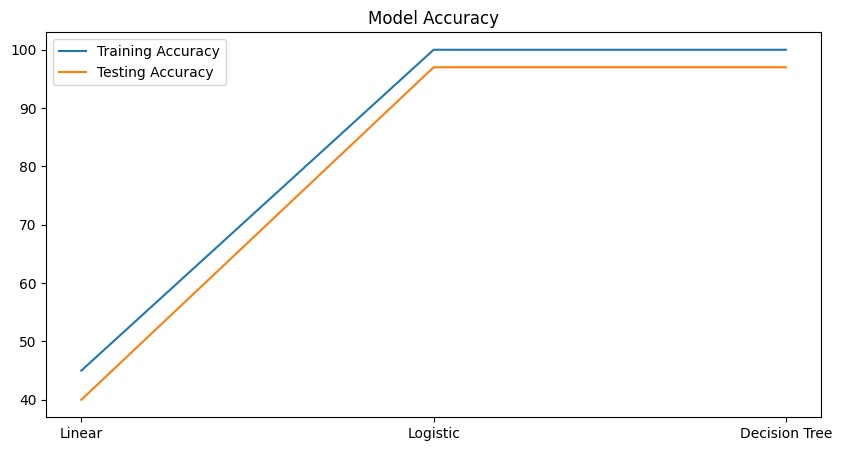

In [56]:
import matplotlib.pyplot as plt
models=['Linear','Logistic','Decision Tree']
training_acc=[45,100,100]
testing_acc=[40,97,97]
plt.figure(figsize=(10,5))
plt.plot(models,training_acc,label='Training Accuracy')
plt.plot(models,testing_acc,label='Testing Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

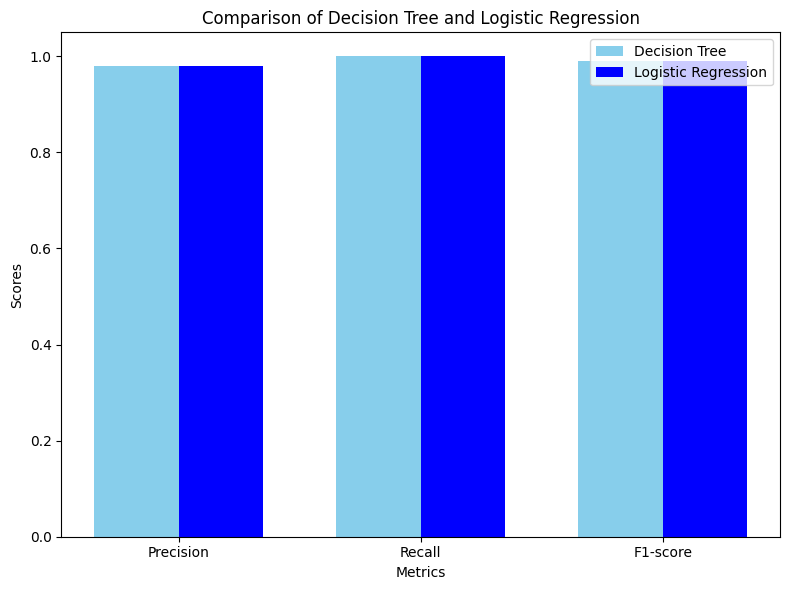

In [57]:
metrics = ['Precision', 'Recall', 'F1-score']

# Values for Decision Tree
precision_dt = 0.98
recall_dt = 1.00
f1_score_dt = 0.99

# Values for Logistic Regression
precision_lr = 0.98
recall_lr = 1.00
f1_score_lr = 0.99

# Grouping the data for both models
decision_tree_scores = [precision_dt, recall_dt, f1_score_dt]
logistic_regression_scores = [precision_lr, recall_lr, f1_score_lr]

# X-axis positions for each metric
x = np.arange(len(metrics))

# Bar width
width = 0.35

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for Decision Tree and Logistic Regression
ax.bar(x - width/2, decision_tree_scores, width, label='Decision Tree', color='skyblue')
ax.bar(x + width/2, logistic_regression_scores, width, label='Logistic Regression', color='blue')

# Add labels, title, and set X-axis ticks
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Decision Tree and Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
